# WEEK09_SVM_synthetic_dataset,_iris_dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn import datasets

(50, 2) (50,)


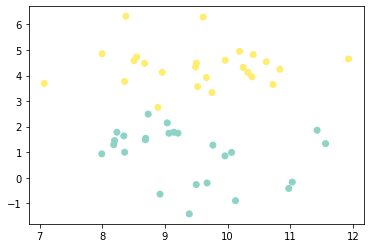

In [27]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3)
print(X.shape,y.shape)

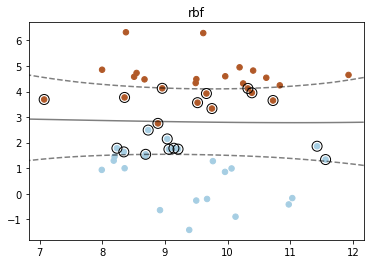

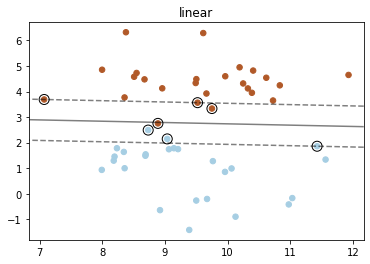

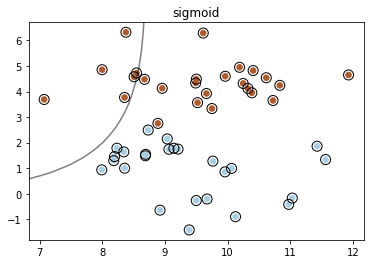

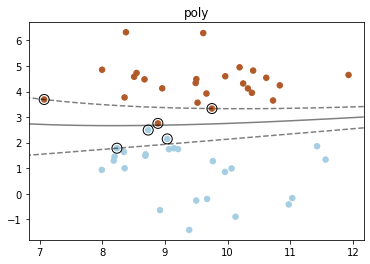

In [28]:
for x in {'linear', 'poly', 'rbf', 'sigmoid'}: 
  # fit the model, don't regularize for illustration purposes
  clf = SVC(kernel=x, C=0.70)
  clf.fit(X, y)

  plt.title(x)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
  ax.contour(
      XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
  )
  # plot support vectors
  ax.scatter(
      clf.support_vectors_[:, 0],
      clf.support_vectors_[:, 1],
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )
  plt.show()

In [4]:
# import some data to play with
iris = datasets.load_iris()
#iris

In [5]:
iris.data.shape

(150, 4)

In [6]:

# Take the first two features. We could avoid this by using a two-dim dataset
X_train = iris.data[:120, :2]
y_train = iris.target[:120]
X_test = iris.data[120:, :2]
y_test = iris.target[120:]
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)


(120, 2) (120,) (30, 2) (30,)


In [8]:
from sklearn.metrics import accuracy_score 
C = 1.0  # SVM regularization parameter
models = (
    SVC(kernel="linear", C=C),
    SVC(C=C, max_iter=10000),
    SVC(kernel="rbf", gamma=0.7, C=C),
    SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_train, y_train) for clf in models)

for model in models:
  print(accuracy_score(model.predict(X_test),y_test))

0.2
0.2
0.2
0.2
